## Theis and Hantush

IHE, Delft, 2010-01-09

Transient groundwater course.

Excercise done in class at the given date, but illustrated and supplied with more explaning comments after the lessons by T.N.Olsthoorn

Here you can make tekst to describe the problem that you're going to solve and its context. You can mix with math fomrulas to be precise with what you want to say or prove.

## Theis

For instance, the Theis well function is mathematically given by this expression:

$$ W(u) = \intop_u^\infty \frac{e^{-y}}{y} dy$$

But, you don't have to implement it in Python, because it is already in the module `scipy.special`, from which you can import it as follows (and rename it to `W` at the same time.

In [25]:
from scipy.special import exp1 as W

## The Theory (section 6.3.3 - 6.3.5 of the syllabus)

The well function (exponential integral) can also be expressed mathemacailly as a power series

$$W(u) = -\gamma -\ln u + u - \frac {u^2}{2 \times 2!} + \frac {u^3}{3 \times 3!} - \frac{u^4}{4 \times 4!} + ...$$

In which $\gamma =0.577216$, Euler's constant, a fundamental mathematical constant like $\pi$ or $e$.

For very small values of $u$, all the higher terms can be neglected. In that case we obtain a simpliefication of the well function

$$W(u) \approx -0.577216 - \ln u,\,\,\,\,\mbox{if}\,\,u << \ln u $$

Then, turning -0.577216 into a log ($-\log(1.7811)$, combining the two logarithms and inverting the argument to remove the minus sign in the front, we obtain

$$W(u) \approx \ln \left( \frac{2.25 kD t}{r^2 S} \right)$$

This yields a straight line if plotted against the time on a logarithmic scale.

We can then use this approximation to obtain the transmissivity even from a pumped well using the drawdown per log  cycle. This drawdown can be expressed mathematically as

$$ s(x, 10t) -s(x, t) = \frac {Q}{4 \pi kD} \left[\ln \left(\frac{2.25 kD 10 t)}{r^2 S}\right) - \ln \left( \frac{2.25 kD t}{r^2 S}\right) \right]$$

which yields

$$ s(x, 10t) -s(x, t) = \frac {Q}{4 \pi kD} \ln 10 = \frac{Q}{4 \pi kD} 2.3 $$

This works for any well, with or without clogging or partial penetration effects, because, it does not depend on the absolote value of the drawdown, but only on a difference of two drawdowns. When for each of the two drawdowns the effect of clogging etc. is the same, which is here obviously the case, then subtracting them eliminates these effects.

But you can't obtain the storage coefficient from the pumped well from the simplified drawdown expression, because to do so you would set the argument equal to one, so that the computed drawdown will be zero. Then you would need a measured value for the time at zero drawdown, that you would take as the time at which straight line on the half-log graph intersects the line $s=0$. However, this s is influenced by extra drawdown due to partial penetration and clogging of the well, and so it's not the one that you need. Taking it, would than yield the wrong value. Hence, to also determine the storage coefficient from a field test, you need at least one observation well. An observation well is not disturbed by pumping because the flow into and out of it's screen is negligible. It may be affected by partial penetration of the screen of the pumping well only partially penetrates the aqufier and the  observation well is closer to the well than about 1.5 times the thickness of the aquifer. However, is necessary, the effect of partial penetration can be computed separately, thus allowing the measurement of the observation well to be corrected before use. If the distance to the well is more than about 1.5 times the thickness of the aquifer, then there is no correction necessary.

In practice, you mostly don't have observation wells available. Therefore you can't determine the storage coefficient. In such cases you could just estimate it differently, for instance using your experience with the eaquifer or simply saying the specific yield of the unconfined aquifer is about 0.2 and that of the (semi)-confined aquifer is about 0.001. A bit wrong, may be, but generally not really far off.

### Hantush

Hantush derived an analytical solution for transient flow to a semi-confined well.

$$ W_h \left( u,\frac{r}{\lambda} \right)= \intop_u^\infty
\frac{e^{-y-\frac{\left(\frac{r}{2\lambda}\right)^2}{y}}}{y} dy
$$

It is similar to that of Theis but it also depends on the parameter $\frac{r}{\lambda}$, where $\lambda = \sqrt{kD \, c}$ is the so-called `characteristic lenght` of the semi-confined aquier, also known as `spreading length`.

It can be seen that when $\lambda \rightarrow \infty$, i.e. when $c \rightarrow \infty$ we get the solution by Theis back.

The `characteristic length` $\lambda$ scales the distance $r$ to the well and doing so determines the effective size of the final (steady-state) cone of depression, that we already know from the steady-state drawdown in a semi-confined aquifer

$$s(r) = \frac Q {4 \pi kD} \mbox{K}_0 \left(\frac r \lambda \right)$$

Beacuse for very large $t$ the Hantush drawdown becomes steady, the Hantush drawdown must be equal to the steady-state drawdown for lart $t$ (i.e. for small $u$), so we have

$$\lim_{t \rightarrow\infty} {\frac Q {4 \pi kD} \mbox{W} \left( u, \frac r \lambda \right)} = \frac Q {2 \pi kD} \mbox{K}_0 \left( \frac r \lambda \right)$$

Hence,

$$\lim_{t \rightarrow\infty} {\mbox{W} \left( u, \frac r \lambda \right)} = 2  \mbox{K}_0 \left( \frac r \lambda \right)$$

This relates the stead-state and the transiend formula for the semi-confined aquifer.

Just to show how bracktes work:

$$
\left\{
\left|
\left[
\left(
\mbox{these are some things you can do with brackets that will scale with the vertical size of your math equations}
\right)
\right]
\right|
\right\}$$

## Loading engineering and scientific functionality into python

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import exp1 as W

### Convenience function for setting up graphs

To prevent a lot of repeated typing hereafter to setup you figures, you may want to define a convenience function to do that for you.

The function is fully documented according to the Pyton documentation standards. The three-double quotes encompass a larger multi-line text block. When later you type the name of the function followed by an `(` and press shift-tab, you will get this text as information about the function and its usage, just like it is the case with any other function in Python.

I included the paramter size_inches to allow setting the size of the figure, because normally Jupyter
makes the figures very small. I made a default size such that it convenes me in most cases.

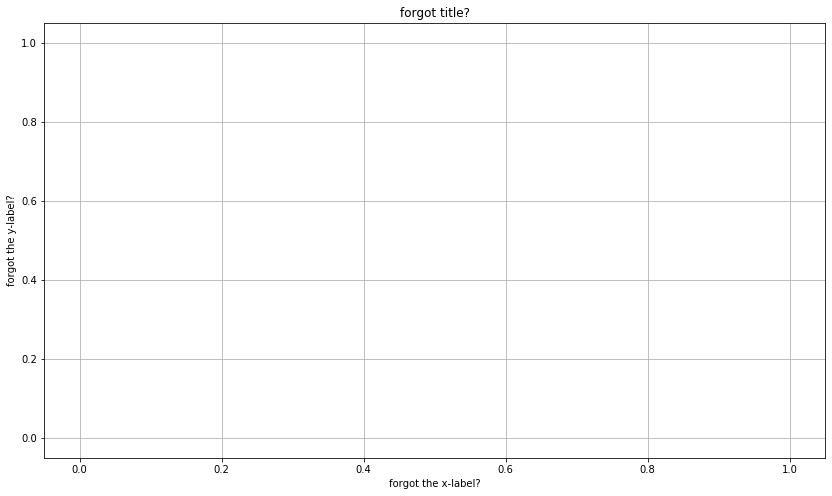

In [48]:
def newfig(title='forgot title?', xlabel='forgot the x-label?', ylabel='forgot the y-label?',
           xlim=None, ylim=None, xscale='linear', yscale='linear', size_inches=(14, 8)):
    
    '''Return an axes set up to your liking, to plot lines on
    
    parameters
    ----------
    title: string
        the title above your figure
    xlabel: string
        the title of your horizontal axis
    ylabel: string
        the title of your vertical axis
    xlim: a tuple with two values
        the desired limits of your horizontal axis
    ylim: a tuple with two values
        the desired limits of your vertical axis
    xscale: string
        'log' sets the horizontal scale to logarithmic
    yscale: string
        'log' sets the vertical scale to logarithmic
    size_inches : tuple (w, h)
        telling the desired width w and height h of the figure
    '''
    
    plt.grid()
    plt.xscale(xscale)
    plt.yscale(yscale)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if xlim is not None: plt.xlim(xlim)
    if ylim is not None: plt.ylim(ylim)
    plt.gcf().set_size_inches(size_inches)
    return plt.gca()   # you don't have to use this, but if you one to return something you return the current axis

# This line shows what the axis will lokk like when called without any parameters (it will use the defaults)
newfig() # try pressing shift-tab when the cursor is within the ()

## Draw the Theis type curve

To do that, we generate values of u and plot W(u) versus 1/u on a figure with logarithmic horizontal and vertical axes. (Notice that `axis` is singular, `axes` is plural in English). So`axes` is used for the figure with both the horizontal and the vertical axis including the grid lines. But `axis` denotes either the x-axis or the y-axis (or the z-axis in 3D cases).

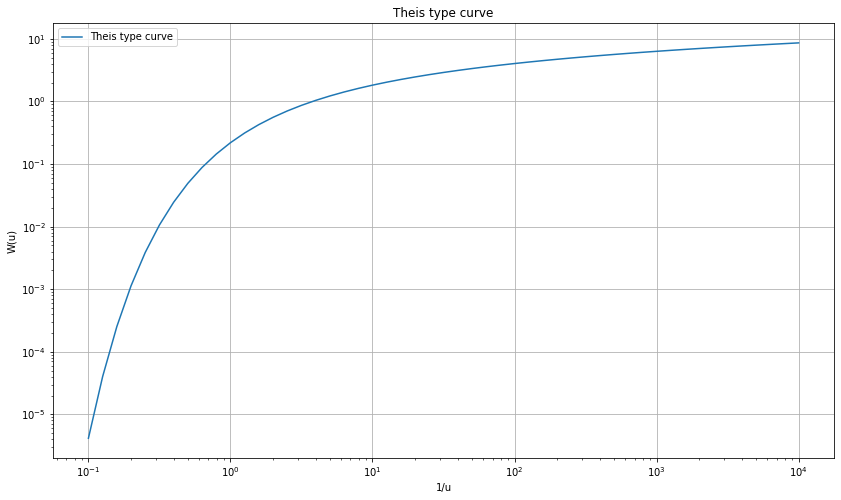

In [39]:
# Generate u-values. Logspace is used, because u will span multiple log-cycles. Hence we require here
# 51 points between and including the first and the last value, which are 1e-4 (=0.0001) and 1e1 (=10)
u = np.logspace(-4, 1, 51)

# Gen create the setup for the figure, using the convenience fucntion we created above
# Because all parameters of the function have names and default values, we just specify
# the parametrs that we need and leave out the ones for which we want to use the default values.
newfig(title='Theis type curve', xlabel='1/u', ylabel='W(u)', xscale='log', yscale='log')

# Then plot
plt.plot(1/u, W(u), label='Theis type curve')
plt.legend()

If you don't specify the names of the parameters of the function, than you must specify the parameters in the order that they are defined in the function and can't leave any out. This is true until one parameter is
encountered in the call that is specified by its name. After that, all further parameters must be specified by name. For non-specified parameters, their default values will be used.

Showing this, by plotting the figure above again, but now also using the default for yaxis (='linear'), so that we  can omit specifying it.

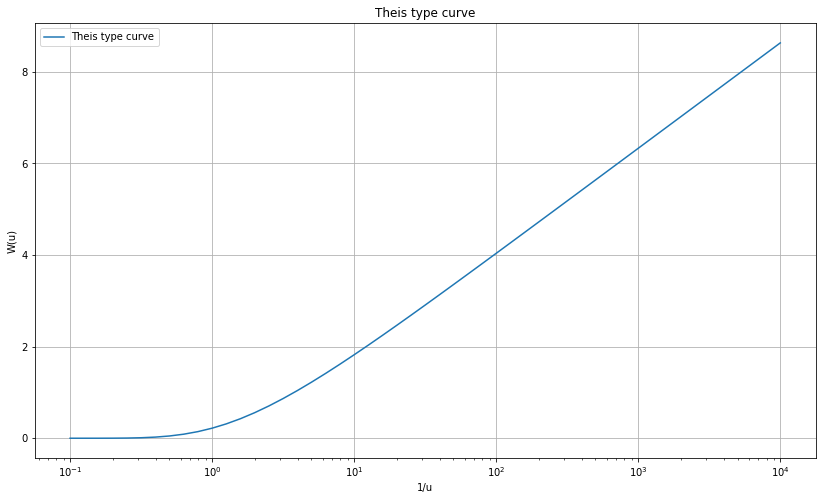

In [41]:
u = np.logspace(-4, 1, 51)

newfig('Theis type curve', '1/u', 'W(u)', xscale='log')
plt.plot(1/u, W(u), label='Theis type curve')
plt.legend()

Finally, let's use the xlim and ylim. I'll specify the limits of the x-axis to be 1e-1 and 1e2 and of the y-axis to be 0 and 4. And to invert the y-axis I'll specify the limits of the y-axis in reversed order ylim=(4, 0) instead of ylim=(0, 4)

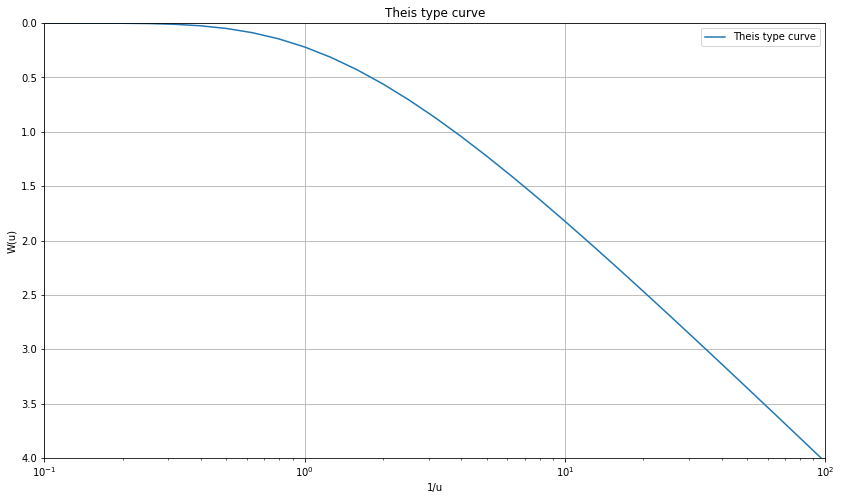

In [43]:
u = np.logspace(-4, 1, 51)

newfig('Theis type curve', '1/u', 'W(u)', xscale='log', xlim=(1e-1, 1e2), ylim=(4, 0))
plt.plot(1/u, W(u), label='Theis type curve')
plt.legend()

This is already quite a lot about generating a plot. With the simple convenience function newfig(), we can generate may forms of graphics, without much typing. newfig() is, therefore, really convenient. The cluttering that is prevents, also makes the code much easier to read.

Below is another way to reques help about a function, which always works in Python: What is then prints is the signature of the function (how you call it, with what parameters) and the help block just below it. So you see that documenting your own functions the official way is very useful, also for yourself.

In [47]:
help(newfig)

Help on function newfig in module __main__:

newfig(title='forgot title?', xlabel='forgot the x-label?', ylabel='forgot the y-label?', xlim=None, ylim=None, xscale='linear', yscale='linear', size_inches=(14, 8))
    Return an axes set up to your liking with given default values
    
    parameters
    ----------
    title: string
        the title above your figure
    xlabel: string
        the title of your horizontal axis
    ylabel: string
        the title of your vertical axis
    xlim: a tuple with two values
        the desired limits of your horizontal axis
    ylim: a tuple with two values
        the desired limits of your vertical axis
    xscale: string
        'log' sets the horizontal scale to logarithmic
    yscale: string
        'log' sets the vertical scale to logarithmic
    size_inches : tuple (w, h)
        telling the desired width w and height h of the figure



# Simulate a pumping test (Theis situation) using the double log and the half-log methods discussed in class

Let's simulate a pumping test, by generating some "measured drawdowns" and see how these relate to the Theis solution.

We junt generate the drawdonw for 4 observation wells at different distances, plot them as a function of time and ans a function of $t/r^2$ and compare them with the Theis type curve.

Generate "measurements" first

To generate some "measurements" we choose a kD, S and an extraction rate and then compute the drawdowns for 4 piezometes (observation wells).

In [63]:
kD = 600 # m2/d
S = 0.001 # storage coefficient
Q = 1200 # m3/d, well extraction rate

# Piezometer specific data
names = ['pz1', 'pz2', 'pz3', 'pz4']
radii = [10, 30, 100, 250] # their distance from the pumping well
times = np.logspace(-3, 1, 41) # d, measurement times
markers = ['o', 'x', '+', 's'] # markers to use when plotting the measuring points

# Put these data into a dictionary, which gives us a handy database.
piez = dict() # generate an empty dictionary with the name 'piez'

# Fill the dict with data
for name, r, m in zip(names, radii, markers):
    piez[name] = {'m':m,  # each piezometer gets its own marker
                  'r': r, # its own distance to the pumping well
                  't': times, # its measurement times (may differ for each well)
                  's': Q/(4 * np.pi * kD) * W(r ** 2 * S / (4 * kD * times)) # and the (generated drawdown)
                 }
    

###### Explanation, what did we do?

Well we generated data for four observation wells using their names, distance and measuring times.

How did we do that?

By putting these that in a dictionary. A dictionary is a container that has key, while you can store things of any type at any key. We first initialized an empty dictionary with the name `piez` to store all information pertaining  to our observation wells (piezometers, hence the name `piez`), even if we had a million of them. To get the information of a particular piezometer back afterwards, just use the key (which is the piezometer's name), like this

In [64]:
piez['pz3'] # show all the data pertaining to piezometer with name 'pz3'

{'m': '+',
 'r': 100,
 't': array([1.00000000e-03, 1.25892541e-03, 1.58489319e-03, 1.99526231e-03,
        2.51188643e-03, 3.16227766e-03, 3.98107171e-03, 5.01187234e-03,
        6.30957344e-03, 7.94328235e-03, 1.00000000e-02, 1.25892541e-02,
        1.58489319e-02, 1.99526231e-02, 2.51188643e-02, 3.16227766e-02,
        3.98107171e-02, 5.01187234e-02, 6.30957344e-02, 7.94328235e-02,
        1.00000000e-01, 1.25892541e-01, 1.58489319e-01, 1.99526231e-01,
        2.51188643e-01, 3.16227766e-01, 3.98107171e-01, 5.01187234e-01,
        6.30957344e-01, 7.94328235e-01, 1.00000000e+00, 1.25892541e+00,
        1.58489319e+00, 1.99526231e+00, 2.51188643e+00, 3.16227766e+00,
        3.98107171e+00, 5.01187234e+00, 6.30957344e+00, 7.94328235e+00,
        1.00000000e+01]),
 's': array([4.91831100e-04, 1.40554500e-03, 3.34837886e-03, 6.89199894e-03,
        1.26103028e-02, 2.09789852e-02, 3.23089668e-02, 4.67256794e-02,
        6.41863875e-02, 8.45191648e-02, 1.07468030e-01, 1.32733929e-01,
      

In the loop we use this line which stores the piezometer information 

piez[name] = {'r': r, 't': times, 's': Q/(4 * np.pi * kD) * W(r ** 2 * S / (4 * kD * times))}

The part between the { } is itself a dictionary. This is the way in which a dictionary of unknown name can be filled at one by specifying  a key followed by a colon (:) followed by the data to store a comma and then the next
item.

So what we did is, specifying the data for each piezometer to be a dictionary with its own keys, namely 'r', 't' and 's'. The values that we stored are the radiuss ('r': r) the measuring times ('t': times) and the dradown ('s: ...) where ... is the computed values of s using kD, S, W().

With this final data in place, we can now request things as follows

piez['pz2'] # all data of piezometer 'pz2'
piez['pz2']['r'] # the distance r of piezometer 2 (from the pumping well)
piez['pz3']['t'] # the measurement times of piezometer 'pz3'
piez['pz1']['s'] # the measured data of piezometer 'pz1'


In fact we now have a database for all of our piezometers keeping all data pertaining to each piezometer together,  so that we never have to look where they are.

We can easily extend the data, for instance by adding specific info like depth and width of the screen, original constructor, drilling method, owner, original cost, construction data, who takes the measurments etc etc. Hence, we created a real database. More so, the measurement times may differ for each piezometer. It doesn't matter.

Of course, for this example, we generated the data, but in a real case, you would read the data from a file, because it concerns measurements. But that does not change the way of handling them.

In [65]:
piez['pz3']['r']  # show the radius of piezometer with name 'pz3'

100

## Show the "measurements" versus time on double log scales

Ok, so far, then let's plot the data, versus time, using their markers to differentiate cleary between them.

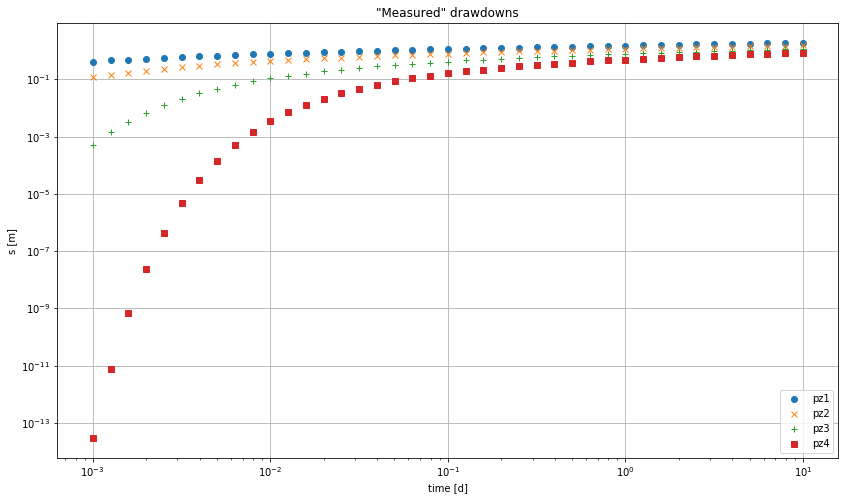

In [71]:
newfig('"Measured" drawdowns', 'time [d]', 's [m]', xscale='log', yscale='log')

for name in piez:
    pz = piez[name]
    plt.plot(pz['t'], pz['s'], pz['m'], label=name) # '.' plots only the meaurements, not the line that connects them
plt.legend()

## Show the measurements on double log scales versus $t/r^2$ instead of versus $t$

Now plot the data not versus $t$ by versus $t/r^2$ which should cause lines of the individual piezometers to collapse to a single line.

Also notice, how you can put math expressions between dollar signs, like $t/r^2$ in axis labels and titles.

And notice that we put Measured between double quotes "measured" to show that in reality we generated them.

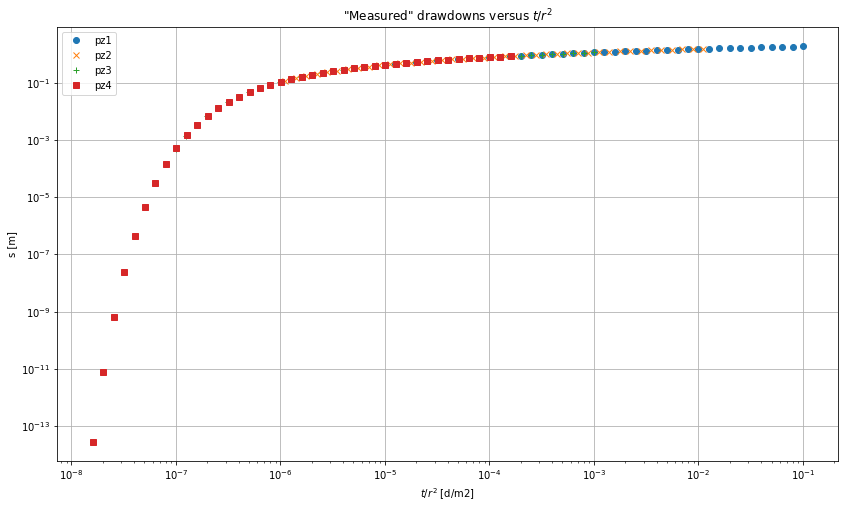

In [70]:
newfig('"Measured" drawdowns versus $t/r^2$', '$t/r^2$ [d/m2]', 's [m]', xscale='log', yscale='log')

for name in piez:
    pz = piez[name]
    plt.plot(pz['t']/pz['r'] ** 2, pz['s'], pz['m'], label=name) # '.' plots only the meaurements, not the line that connects them
plt.legend()

Clearly, all measurments now fall on the same overall curve.

## Shift the measurements until they fit with the type curve

To interpret the pumping test, we should fit the measurements to the Theis curve. There are differnt ways to do that. But the simplist for you is to plot the measurments multiplied by a factor V and the t/r^2 multiplied by a factor H and adjust these two vectors untill the measurements fall as well as possible on the theis curve. So estimate them by trial and error, which is the equivalent of shifting one paper over the other untill both match.

Ok, so I define the factor V (for vertical shift) and the factor H (for horizontal shift). Multipley measurements s by V and t/r^2 by H, plot these values so V*s versus H * t/r^2 on the graph with the theis type curve (W(u) versus 1/u) until the match is satisfactory. When we're satisfied, we have the sought factors V and H.

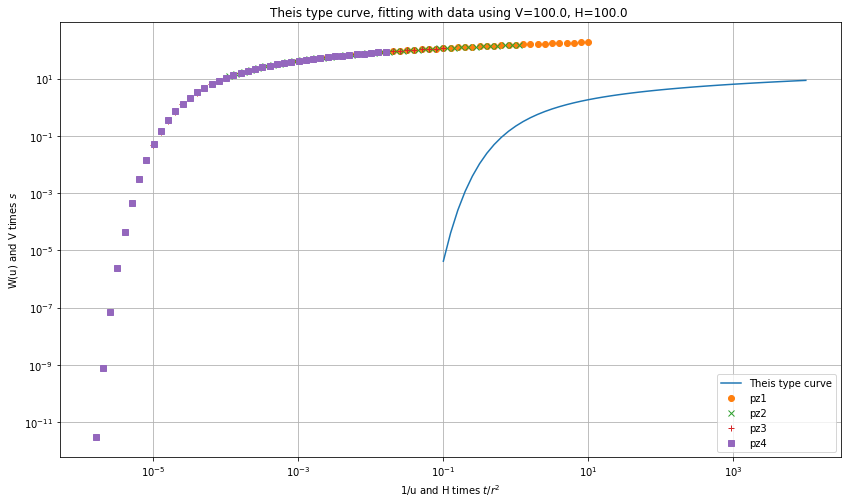

In [83]:
V = 100. # vertical factor
H = 100. # horizonta factor


u = np.logspace(-4, 1, 51)

newfig(f'Theis type curve, fitting with data using V={V}, H={H} ', '1/u and H times $t/r^2$', 'W(u) and V times $s$', xscale='log', yscale='log')

plt.plot(1/u, W(u), label='Theis type curve')

for nm in piez:
    pz = piez[nm]
    
    plt.plot(H * pz['t']/pz['r'] ** 2, V * pz['s'], pz['m'], label=nm)

plt.legend()
plt.show()


## Result after some trial and error

Ok, the first trial above is not so good. Let's do it better by trial and error

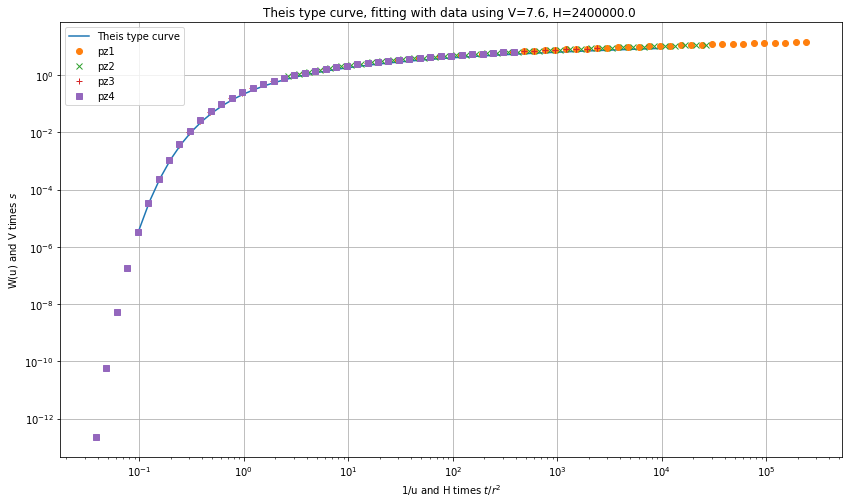

In [100]:
V = 0.76e1 # vertical factor
H = 2.4e6 # horizonta factor


u = np.logspace(-4, 1, 51)

newfig(f'Theis type curve, fitting with data using V={V}, H={H} ', '1/u and H times $t/r^2$', 'W(u) and V times $s$', xscale='log', yscale='log')

plt.plot(1/u, W(u), label='Theis type curve')

for nm in piez:
    pz = piez[nm]
    
    plt.plot(H * pz['t']/pz['r'] ** 2, V * pz['s'], pz['m'], label=nm)

plt.legend()
plt.show()



## With the factor V and H now obtained, find $kD$ and $S$

After a minute or so of trial and error, this is the result, which seems quite good to me.

So we have the V and H values, which are shown in the title of the graph.

Next thing is to determine the kD and the S from the H and the V.

Theory:
$$ s = \frac Q {4 \pi kD} W(u) $$

We have
$$ V s =  W(u) $$

hence
$$V = \frac {4 \pi kD} Q$$

$$ kD = \frac {V Q} {4 \pi} = \frac {7.6 \times 1200}{4 \pi} = 725 \,\,\,m^2/d$$


We further have

$$ H \frac{t}{r^2} = \frac 1 u$$ 

$$ H \frac {t}{r^2} = \frac{4 kD t}{r^2 S} $$

Hence

$$H = \frac {4 kD} S $$

so that

$$S  = \frac {4 kD} H = \frac {4 \times 725}{2.4\times 10^6} = 0.0012$$

## How good are the results? Compare with graphs generated by the original (in reality unknown $kD$ and $S$

Now return to the values that were used to generate the measured data in the top, i.e.

kD = 600 m2/d
S = 0.001

Then we see that we are close, but not perfect. So perhaps, the fit between the data and the type curve could still be improved, although it seems very good.

A way to check is by plotting the data computed with the interpreted kD and S together with the measurments. Let's do that now.


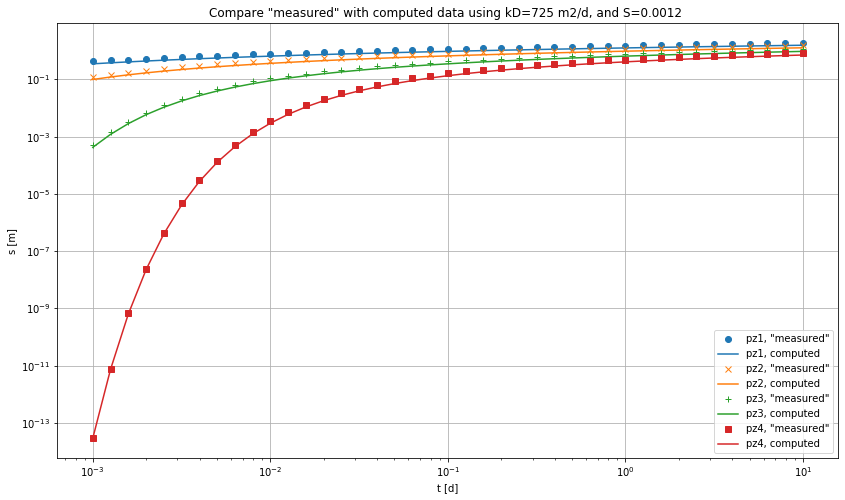

In [111]:
kD = 725 # m2/d interpreted
S = 0.0012 # interpreted

newfig(f'Compare "measured" with computed data using kD={kD} m2/d, and S={S} ', 't [d]', 's [m]', xscale='log', yscale='log')

for nm in piez:
    pz = piez[nm]
    
    L = plt.plot(pz['t'], pz['s'], pz['m'], label=f'{nm}, "measured"')
    clr = L[0].get_color() # get the color from the previous line, to use it in the next line
    plt.plot(pz['t'], Q /(4 * np.pi * kD) * W(pz['r'] ** 2 * S / (4 * kD * pz['t'])), '-', color=clr, label=f'{nm}, computed')

plt.legend()
plt.show()



In conclusion, the results are quite good, even though the interpreted kD (725 m2/d) deviates from the original kD (600 m2/d). It can only mean that the results are not too sensitive to the precise value of kD.

However, that is not the case. The real reason is that a small error in the vertical fit for the large drawdowns is still quite large due to the logarithmic scale. In fact, although the blue lines seems to fit the blue dots quite well, they do not fit them perfectly, while a small error in the top of the graph may still be quite large.


We can easily verify this by plotting the same lines, but now using a linear vertical scale. This is done next.

## Check on linear vertical scale, and then interprete using half log paper

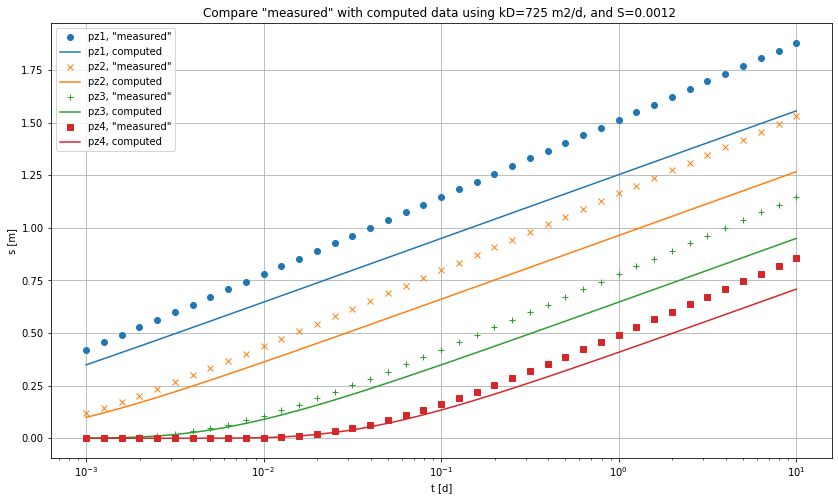

In [113]:
kD = 725 # m2/d interpreted
S = 0.0012 # interpreted

newfig(f'Compare "measured" with computed data using kD={kD} m2/d, and S={S} ', 't [d]', 's [m]', xscale='log')

for nm in piez:
    pz = piez[nm]
    
    L = plt.plot(pz['t'], pz['s'], pz['m'], label=f'{nm}, "measured"')
    clr = L[0].get_color() # get the color from the previous line, to use it in the next line
    plt.plot(pz['t'], Q /(4 * np.pi * kD) * W(pz['r'] ** 2 * S / (4 * kD * pz['t'])), '-', color=clr, label=f'{nm}, computed')

plt.legend()
plt.show()

## Interpret using the straight line on half-log paper

Ok, this is not really perfect.

We now that on half log paper the drawdowns versus time should become linear and parallel. Well, in fact, they do. But the dottes lines (the measurements) are steeper than the computed lines using $kD=725$ m2/d and $S = 0.0012$. This means that our interpreted transmissivity is too high. The higher it is, the flatter will be the computed lines.

Wat we could do, in fact is measure the drawdown per log cycle of the measurements.

I will put a straight line along the yellow x-s of the measurements.

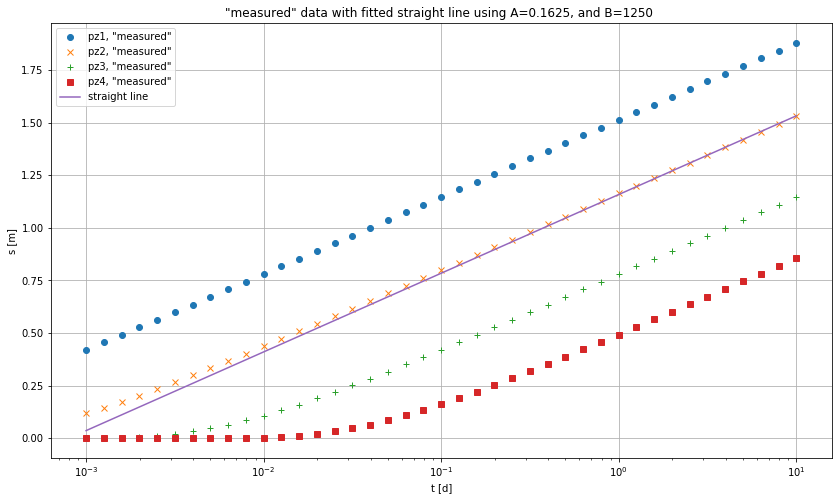

In [145]:
kD = 725 # m2/d interpreted
S = 0.0012 # interpreted

newfig(f'"measured" data with fitted straight line using A={A}, and B={B} ', 't [d]', 's [m]', xscale='log')

for nm in piez:
    pz = piez[nm]
    
    L = plt.plot(pz['t'], pz['s'], pz['m'], label=f'{nm}, "measured"')


# Also by trial and error determine the parameters of the straight line
A = 0.1625
B = 1250

# Straight line
plt.plot(piez['pz2']['t'], A * np.log(B * piez['pz2']['t'] ), label='straight line')
plt.legend()

plt.show()
    

This looks good. Therefore we have

$$ s = A \ln \left( B t \right) = \frac Q {4 \pi kD} \ln\left(\frac{2.25 kD t}{r^2 S}\right) $$

so

$$ A = \frac Q {4 \pi kD}$$

$$ kD = \frac Q {2 \pi A}  = \frac {1200}{4 \, \pi \, 0.1625} = 590 \,m^2/s $$

$$ B = \frac {2.25 kD} {r^2 S}$$

$$ S = \frac {2.25 kD} {r^2 B} = \frac {2.25 \times 590}{30^2 \times 1250} = 0.0012 $$

## Check how close we are to the orginal "measurements" now

To see how far or close we are now, just plot the meaurements again together with the curves based on the intepreted kD and S

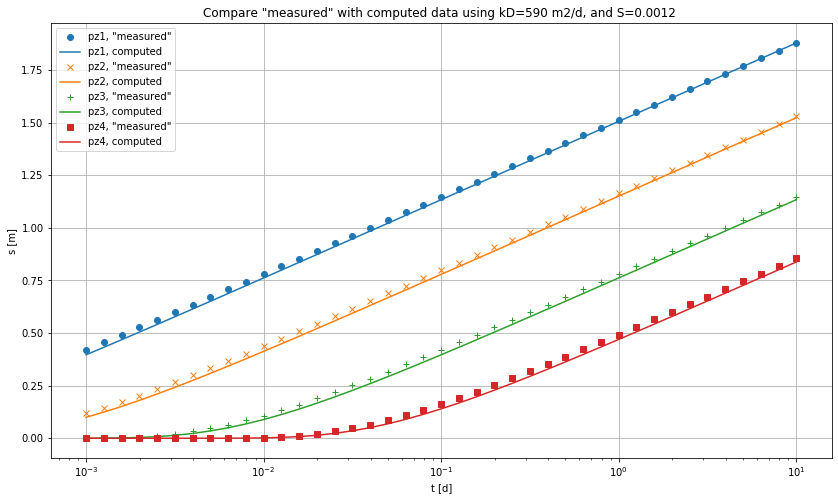

In [150]:
kD = 590 # m2/d interpreted
S = 0.0012 # interpreted

newfig(f'Compare "measured" with computed data using kD={kD} m2/d, and S={S} ', 't [d]', 's [m]', xscale='log')

for nm in piez:
    pz = piez[nm]
    
    L = plt.plot(pz['t'], pz['s'], pz['m'], label=f'{nm}, "measured"')
    clr = L[0].get_color() # get the color from the previous line, to use it in the next line
    plt.plot(pz['t'], Q /(4 * np.pi * kD) * W(pz['r'] ** 2 * S / (4 * kD * pz['t'])), '-', color=clr, label=f'{nm}, computed')

plt.legend()
plt.show()

This looks much better (but could still be a little improved). However its good enough, because with real measurements, we will also have measurement errors, non-homogeneity of the aquifer properties and disturbances due to trends and fluctuations of the background groundwater head, that we have assumed constant during the test. Therefore, in practice, we are extremely unlikely to be better than this.

## Final verdict and using the drawdown per log cycle and time at which the straight line intersects the line of zero drawdown

We generated the measurements using $kD = 600$ m2/d and $S = 0.001$, and have intepreted the measurements to retrieve the original data, after which we ended with $kD = 590 $ m2/d and $S = 0.0012$. Quite close.

We've also seen, that the double-log intepretation can look very good but still be off more than we'd like, which is caused by the compressed data in the higher log-cycles, where 0.5 mm on paper, hardly visible, may still mean a deviation between data and type curve of 15 cm.

However, this was easily verified by making the plot with a linear vertical scale.

Based on that, we interpreted the straight-line portions of the measurements on the graph with linear vertical scale and logarithmic time scale. We did that by fitting a straight line mathematially. However, we could have drawn this straight line with a ruler and a pencil and measured the drawdown per log cycle.

Doing that now, yields 1.5 m / 4 log cycles = 0.375 m /log cycle

$$s_{10t} - s_t = \frac Q {4 \pi kD} \ln 10$$

$$ kD = \frac Q {4 \pi \Delta s} \ln 10 = \frac {1200} {4 \pi 0.375} * \ln 10  = 586 \,\, m^2/d $$

Which is the same as the mathematical way that was used above.

The storage coefficient then follows from the time that the straigth line intersects the line $s=0$. This yields $t= 8\times 10^{-4}d$. So we then have

$$s = 0 \rightarrow \frac{2.25 kD t}{r^2 S} = 1$$

So we have

$$ S = \frac {2.25 kD t}{r^2} = \frac{2.25 \times 586 \times 8 \times 10^{-4}}{30^2}=0.0012$$

## Conclusion

As as demonstrated, using the drawdown per log cycle and the time at which the straight intersects the line $s=0$ yields the same results as the mathematical way in which the values of A and B of the straight line were determined by trial and error.